# Gradient Descent

## 02. Learning using the gradient

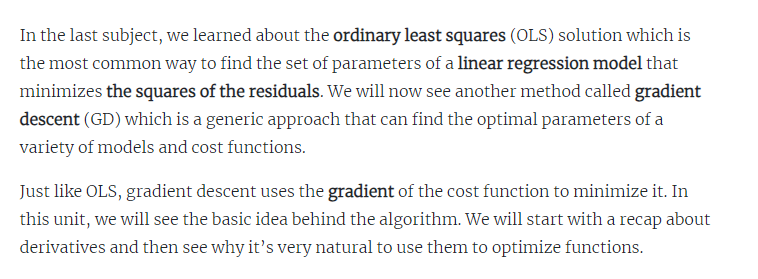

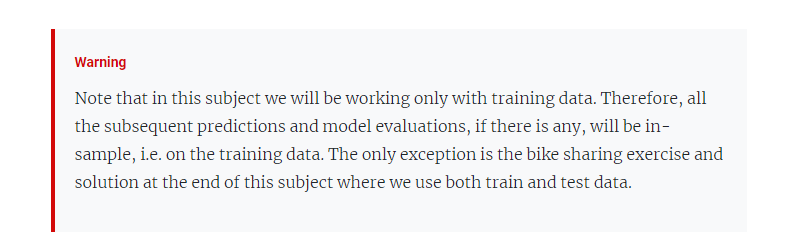

### Follow the gradient

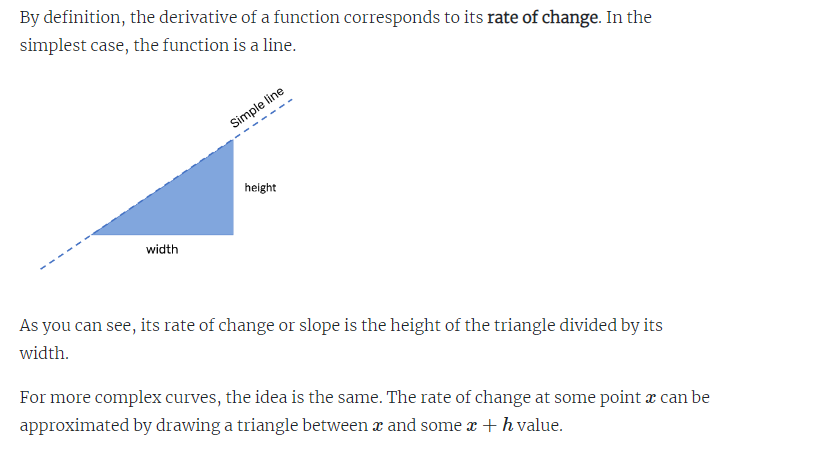

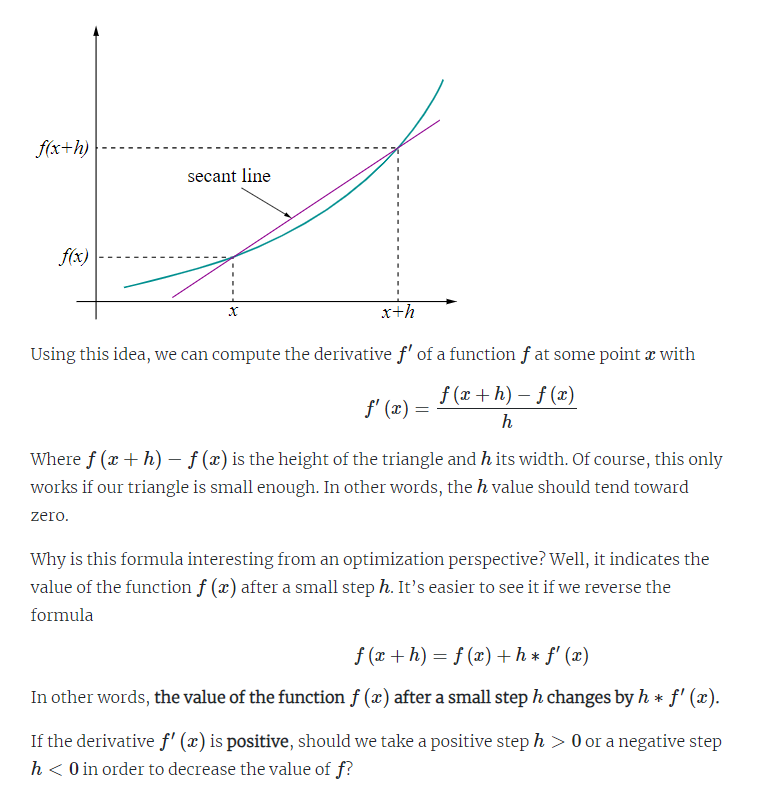

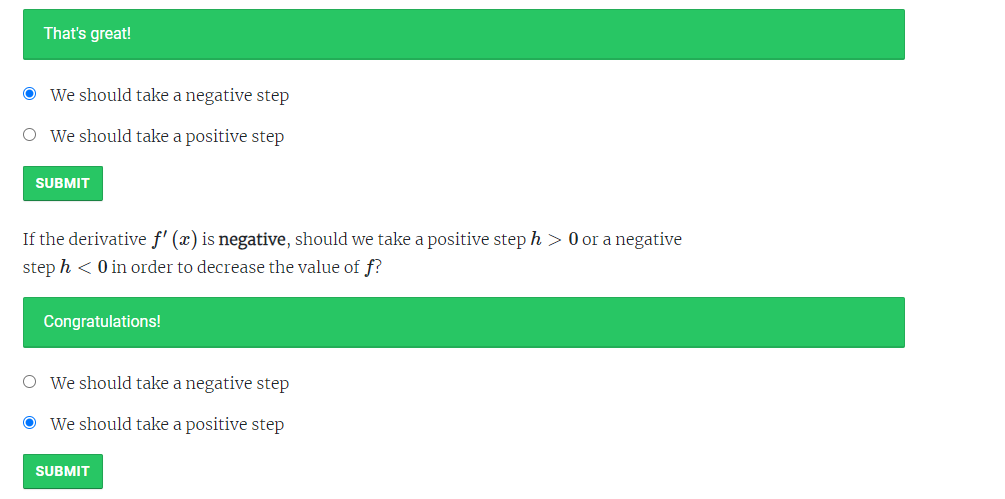

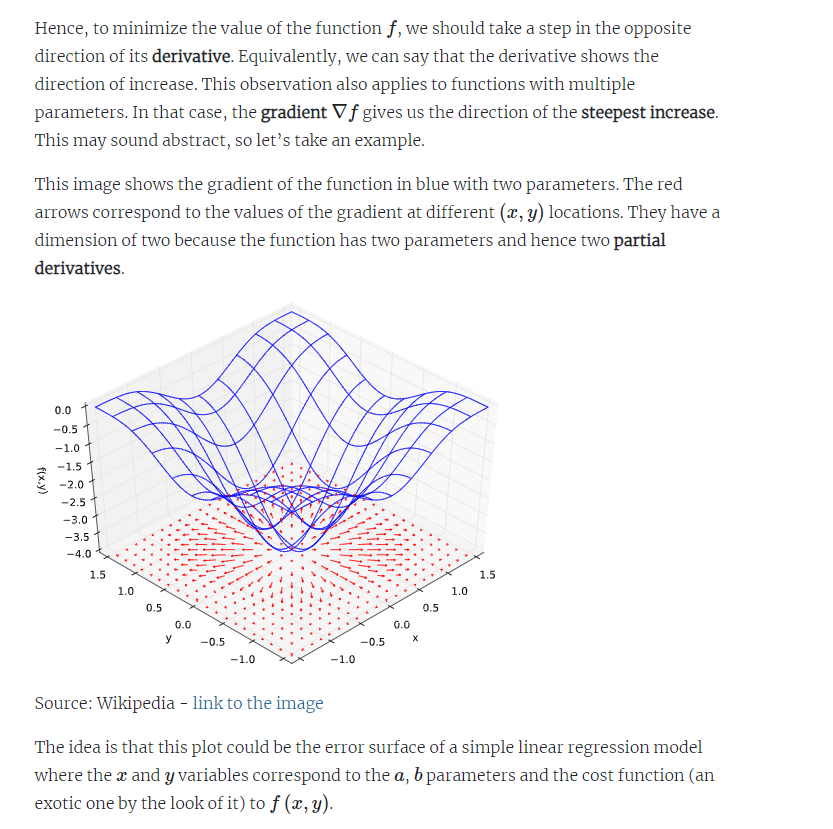

### Local minimum

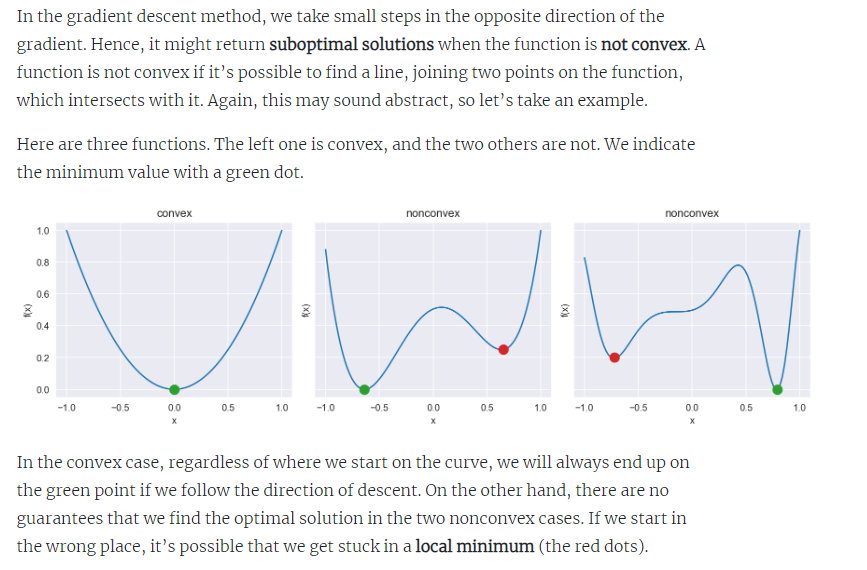

### Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways.

- Gradient descent follows the opposite direction of the **gradient**.
- It may return **suboptimal solutions** when the function is not **convex**.

In the next unit, we will see how to implement the algorithm for the simple linear regression model with the mean squared error (MSE) objective function.

## 03. Gradient descent algorithm

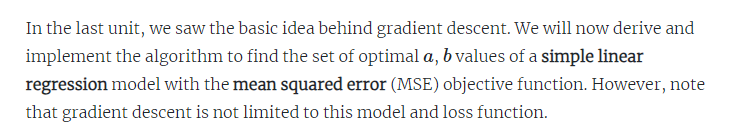

### Step size

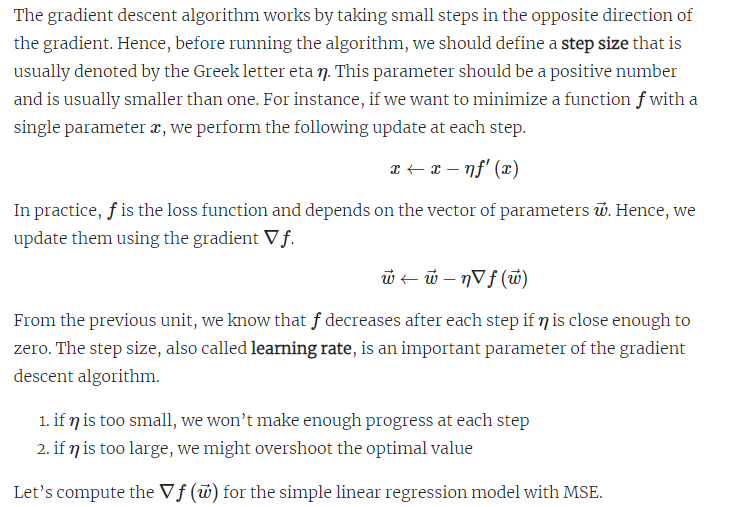

### Compute the gradient

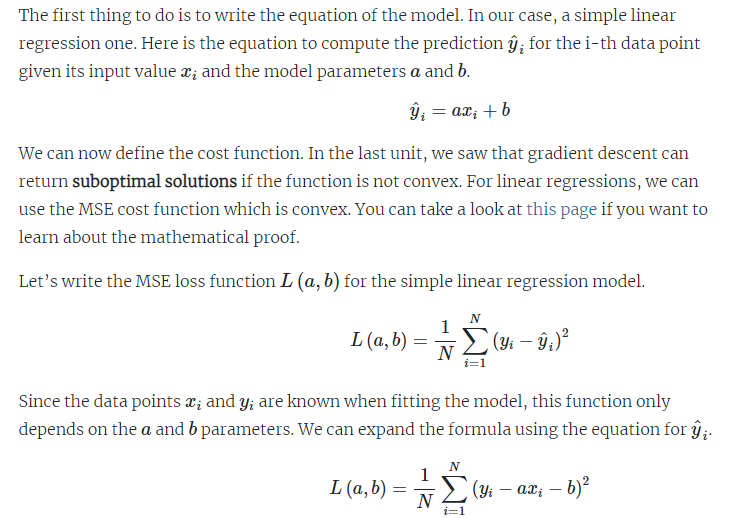

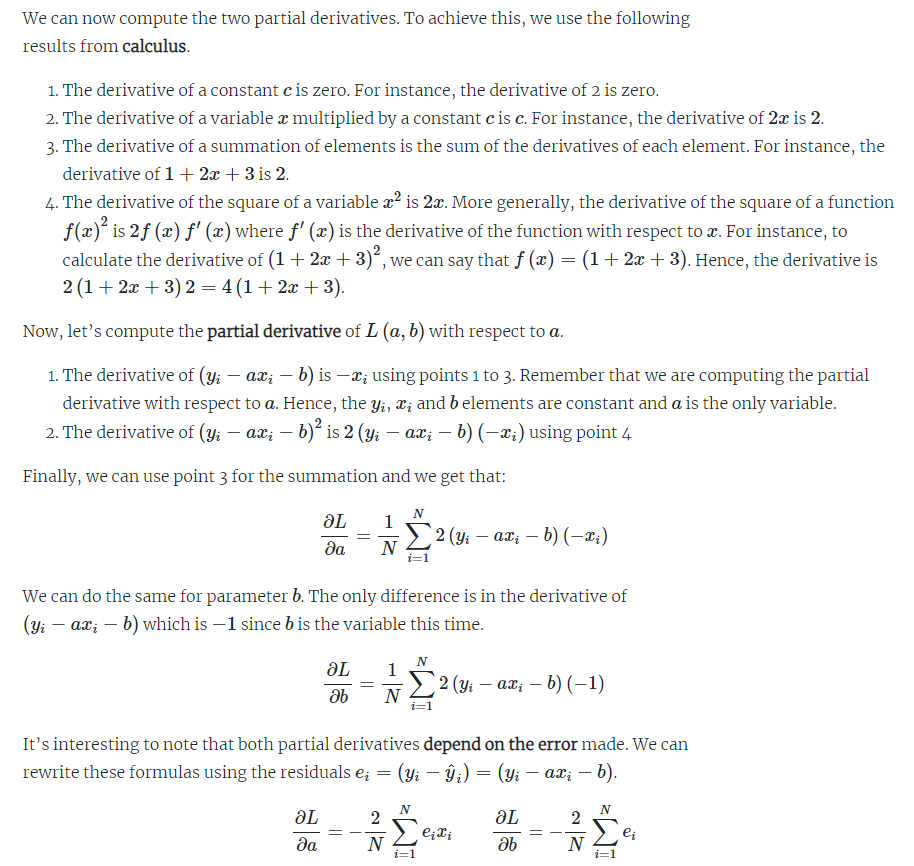

As we can see, the gradient is proportional to the residuals, and the algorithm makes **bigger steps** when it’s further away from the optimal solution.

### Algorithm

We can now use these partial derivatives to write the algorithm. Note that the learning rate lr, the initial a, b values and the number of iterations n_steps depend on the dataset. For this reason, we don’t assign them to specific values in the code below.

In [ ]:
import numpy as np

# Initialization
lr = ... # learning rate
a, b = ... # initial a,b values
n_steps = ... # number of iterations

# n_steps iterations
for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a*x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2*np.mean(x*error)

    # Partial derivative with respect to b
    b_grad = -2*np.mean(error)

    # Update a and b
    a -= lr*a_grad
    b -= lr*b_grad

At each iteration, we compute predictions y_pred using the current a, b values. Then, we create an error variable which is an array of shape (n,), and use it to compute the two partial derivatives. Finally, we update the parameters using the learning rate lr.

### Summary
In this unit, we saw how to derive and implement the gradient descent algorithm for the simple linear regression model with MSE. Here are a few takeaways.

- Gradient descent uses a **learning rate** and the gradient of the loss function to compute the **parameters update**.
- It’s an **iterative algorithm** that takes **small steps** in the opposite direction of the gradient.

In the next unit, we will test our implementation on the bike sharing dataset.


## 04. Numpy implementation

In the last unit, we derived the gradient descent algorithm and implemented it with Numpy. We will now test our implementation on the bike sharing dataset. You can download it from the resource section.

At the end of this unit, you should have a better understanding of the algorithm and know how to track its progress.

### Monitor the loss value

Let’s start by loading the dataset.


In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv("Ressources/c3_bike-sharing.csv")
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


Our goal is to fit a **simple linear regression model** to this data using gradient descent. If our implementation is correct, we should obtain the following result.

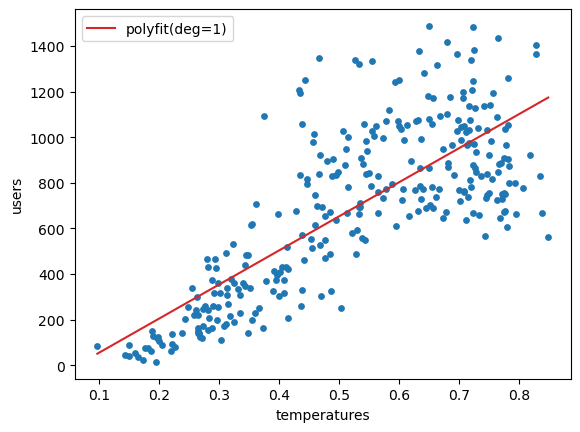

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Linear regression using polyfit
x = data_df.temp.values
y = data_df.users.values
coefs = np.polyfit(x, y, deg=1)

# Plot prediction curve
x_values = np.linspace(x.min(), x.max(), num=100)
y_values = np.polyval(coefs, x_values)
plt.scatter(x, y, s=15)
plt.plot(x_values, y_values, c="C3", label="polyfit(deg=1)")
plt.xlabel("temperatures")
plt.ylabel("users")
plt.legend()
plt.show()

This image shows the 302 data points from the dataset and a simple linear regression model obtained with the Numpy polyfit(x, y, deg=1) function.

Let’s implement the algorithm using the code from the previous unit. This time, we will track the value of the **root mean squared error** (RMSE) function at each iteration. If our implementation is correct, this value should decrease after each step.

In [3]:
# Root mean squared error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

Let’s start by setting the initial values. We can set the learning rate to 0.7 and run the algorithm for 30 steps. Also, we initialize the a, b parameters to zero.

In [4]:
# Initialization
lr = 0.7  # learning rate
a, b = 0, 0
n_steps = 30

We can now run the gradient descent algorithm. Here is the code from the previous unit. We added a line in the for loop to compute and save the RMSE value in a log_rmse variable.

In [5]:
# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a * x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2 * np.mean(x * error)

    # Partial derivative with respect to b
    b_grad = -2 * np.mean(error)

    # Update a and b
    a -= lr * a_grad
    b -= lr * b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

The code should perform 30 iterations and update the a, b at each step. We can verify that the RMSE value decreases by plotting the log_rmse variable.

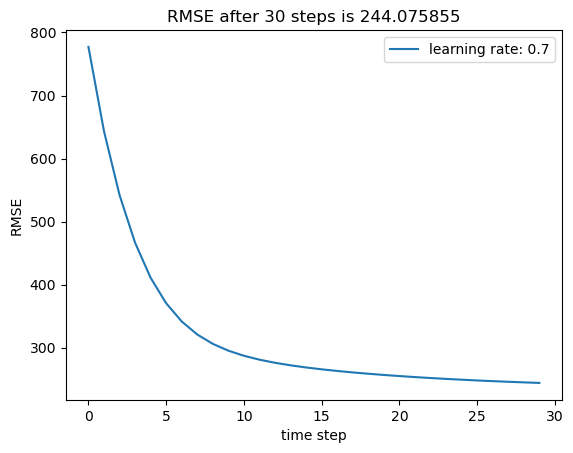

In [6]:
# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {:.6f}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

We can see that the error decreases after each step. The final value is around 244. We can now verify that the a, b values are **optimal** by computing the **ordinary least squares** (OLS) solution. To achieve this, we can use the Numpy polyfit() function.

In [7]:
a_polyfit, b_polyfit = np.polyfit(x, y, 1)

# Optimal parameters vs. ones obtained with GD
print("Polyfit (a, b)=          ({:.2f}, {:.2f})".format(a_polyfit, b_polyfit))
print("Gradient descent (a, b)= ({:.2f}, {:.2f})".format(a, b))

Polyfit (a, b)=          (1495.60, -94.61)
Gradient descent (a, b)= (1133.56, 98.91)


We can see that the values are far from the optimal ones. The slope is 1133.56 instead of 1495.6, and the intercept term is 98.91 instead of -94.61.

Let’s try to increase the number of steps to 400 instead of 30.

In [8]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400  # increase to 400

We can now rerun the algorithm with these new values.

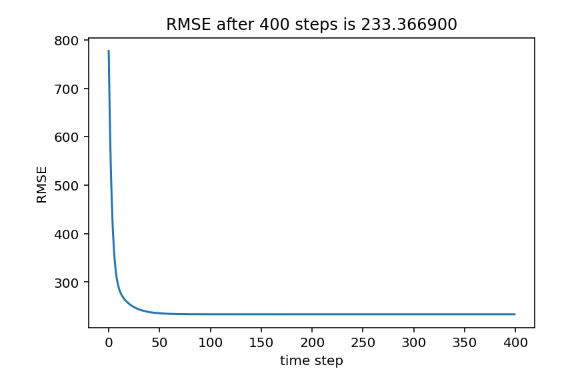

After 400 steps, the RMSE error is around 233, and the parameters are equal to the ones from the polyfit() function with a precision of 2 digits.


In [9]:
a_polyfit, b_polyfit = np.polyfit(x, y, 1)

# Optimal parameters vs. ones obtained with GD
print("Polyfit (a, b)=          ({:.2f}, {:.2f})".format(a_polyfit, b_polyfit))
print("Gradient descent (a, b)= ({:.2f}, {:.2f})".format(a, b))

Polyfit (a, b)=          (1495.60, -94.61)
Gradient descent (a, b)= (0.00, 0.00)


### Convergence
The algorithm doesn’t always **converge** to the optimal solution. For instance, if you increase the learning rate to 0.8, you should see that the error increases after each step and becomes very large.


In [10]:
# Initialization
lr = 0.8
a, b = 0, 0
n_steps = 400

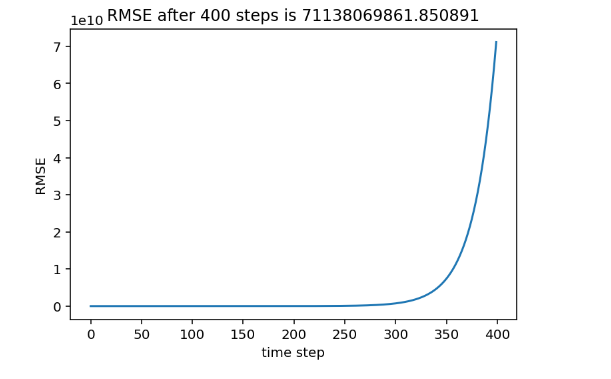

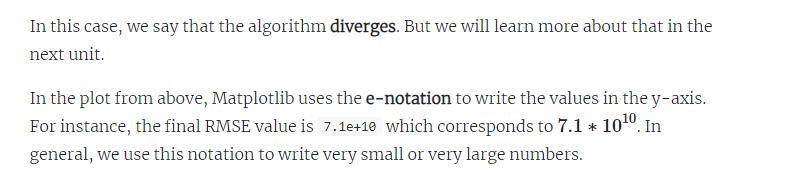

### Stochastic and mini-batch variants

In the code from above, we computed the gradient using all the data points.



In [11]:
# Predictions with the current a,b values
y_pred = a * x + b

# Compute the error vector
error = y - y_pred

# Partial derivative with respect to a
a_grad = -2 * np.mean(x * error)

# Partial derivative with respect to b
b_grad = -2 * np.mean(error)

# Print shape
print("y_pred:", y_pred.shape)
print("error:", error.shape)
print("a_grad:", a_grad.shape)
print("b grad:", b_grad.shape)

y_pred: (302,)
error: (302,)
a_grad: ()
b grad: ()


As you can see, the y_pred, error vectors are arrays with n=302 elements, and we compute the two partial derivates using these 302 data points. In practice, we often calculate the gradient on a subset of the data points. We can distinguish **three variants** of the gradient descent algorithm.

- **Batch** gradient descent - computes the gradient using all data points.
- **Mini-batch** gradient descent - uses a mini-batch of data to compute gradients, e.g. 64, 128, 256 data points.
- **Stochastic** gradient descent - uses a single data point to compute the gradient.

Mini-batch and stochastic gradient descent are often used in practice because they scale well to **large datasets**, e.g., with millions of samples. For instance, the SGDRegressor object from Scikit-learn implements the stochastic variant. Note that we usually select the points at random in these two cases.

### Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways about gradient descent.

- Its **mini-batch** and **stochastic** variants scale to **large datasets** with millions of data points.
- We can track its progress by **monitoring** the loss value.

Gradient descent is a generic and easy to implement optimization method. Also, its mini-batch and stochastic variants are very fast and can be applied to **large datasets** without using much **memory**. However, note that we usually prefer to use **analytical solutions** when they exist (e.g., OLS for linear regressions). For instance, we will only use the SGDRegressor object when it’s not possible to use the LinearRegression one.

In the next unit, we will do a small experiment with gradient descent and see that its performance depends on the scale of the features.

## 05. Issue with the gradient

In the last unit, we used gradient descent to fit a simple linear regression model to the bike sharing dataset. We will now do a simple experiment and see that the algorithm is sensitive to the scale of the data.

### Rescaling data

Let’s start by loading the dataset.



In [13]:
import pandas as pd

# Load the data
data_df = pd.read_csv("Ressources/c3_bike-sharing.csv")
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


Again, the dataset has two variables. The temperatures temp and the number of users users.

We saw in a previous unit that these temperatures are not in degrees Celsius or Fahrenheit. In fact, the temp values were computed using the formula temp=(temp_C+8)/47 where temp_C is the original temperatures measured in degree Celsius.

Let’s do a simple experiment. Instead of applying gradient descent with these rescaled temperatures, let’s use the original values in degree Celsius. To compute them, we can simply reverse to formula from above.

In [14]:
# Create x/y arrays
x = 47 * data_df.temp.values - 8  # Degrees Celsius
y = data_df.users.values

Intuitively, rescaling a variable shouldn’t affect the algorithm since we provide the same information. Here is a comparison of the two datasets.

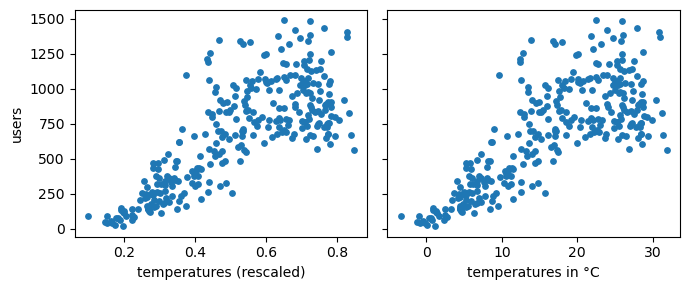

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# Compare the two version
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 3))
ax1.scatter(data_df.temp, y, s=15)
ax1.set_xlabel("temperatures (rescaled)")
ax1.set_ylabel("users")
ax2.scatter(x, y, s=15)
ax2.set_xlabel("temperatures in °C")
plt.tight_layout()
plt.show()

Now, let’s run the gradient descent algorithm with these x, y values. Here is the code from the previous unit.

In [16]:
import numpy as np

# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Root mean square error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))


# Gradient descent
log_rmse = []
for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x + b
    error = y - y_pred
    a_grad = -2 * np.mean(x * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log RMSE score
    log_rmse.append(rmse(y, y_pred))

C:\Users\s1114237\Anaconda3\envs\adsml\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\s1114237\AppData\Local\Temp\ipykernel_13364\1333192532.py:10: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.mean(np.square(y - y_pred)))
C:\Users\s1114237\AppData\Local\Temp\ipykernel_13364\1333192532.py:19: RuntimeWarning: overflow encountered in multiply
  a_grad = -2 * np.mean(x * error)
C:\Users\s1114237\AppData\Local\Temp\ipykernel_13364\1333192532.py:17: RuntimeWarning: invalid value encountered in add
  y_pred = a * x + b


If you run the code, you should get a RuntimeWarning which says that an **overflow** happened. This simply means that one instruction led to a number too large to be stored in the **computer memory**. It’s likely that gradient descent diverged. Let’s verify that by plotting the log_rmse variable.

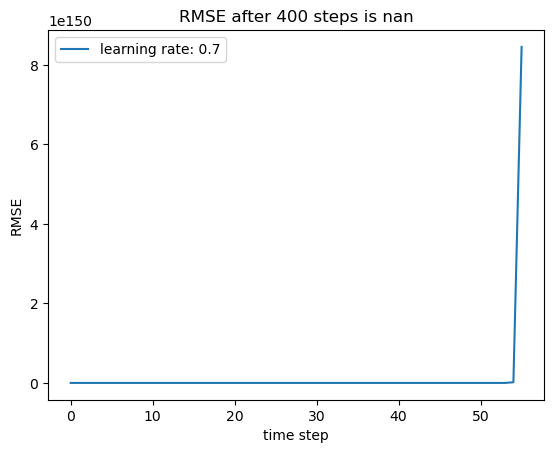

In [17]:
# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

We can see that the RMSE error increases exponentially and that the algorithm diverged. Also, if you print the final value log_rmse[-1], you should get a nan value which represents the result of a numerical operation that didn’t succeed.

### Gradient descent step by step
Let’s try to understand why the algorithm diverged with the temperatures in degrees Celsius. The idea is to visualize how the a, b values change after each iteration of the algorithm.

To achieve this, we will use the rescaled temperatures between zero and one.

In [18]:
# Create x/y arrays
x = data_df.temp.values
y = data_df.users.values

Let’s run the algorithm and save the a, b values after each step in a log_a and a log_b variable.

In [19]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x + b
    error = y - y_pred
    a_grad = -2 * np.mean(x * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)

We can now plot the two variables.

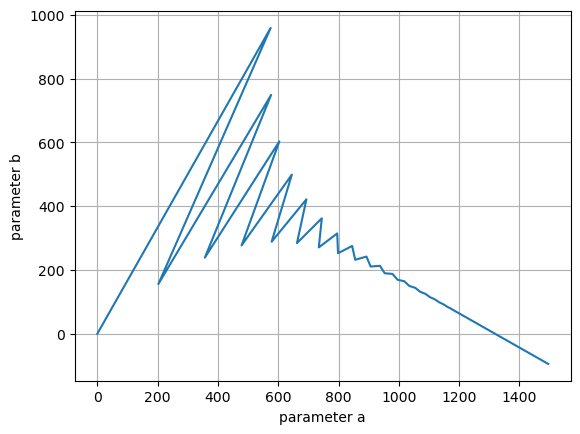

In [20]:
# Visualize steps
plt.plot(log_a, log_b)
plt.grid()
plt.xlabel("parameter a")
plt.ylabel("parameter b")
plt.show()

As you can see, gradient descent takes a **zigzag path** to the optimal solution. To understand why it takes this path, we can plot the **error surface**. The idea is to evaluate the loss value for each **(a,b)** point in the plot from above. Plotting the error surface is not straightforward. For this reason, we provide a visualize_steps() function in the annex below. The function expects four parameters.

- log_a, log_b - two lists that contain the a, b values at each iteration of the algorithm
- x, y - the input and target values

Let’s test the function.

In [24]:
#Annex - plotting the error surface
# Here is the code of the visualize_steps() function. Note that it uses the meshgrid() and the contourf() functions from Numpy and Matplotlib. You might want to take a look at this stackoverflow answer to understand how they work.

# Plot the error surface
def visualize_steps(fig, axis, log_a, log_b, x, y):
    # Define a grid of a,b parameters
    min_ab = min(min(log_a), min(log_b))
    max_ab = max(max(log_a), max(log_b))

    d = max_ab - min_ab
    min_ab -= d * 0.1
    max_ab += d * 0.1

    a = np.linspace(min_ab, max_ab, num=40)
    b = np.linspace(min_ab, max_ab, num=40)
    a_grid, b_grid = np.meshgrid(a, b)

    # Compute the RMSE score for each a,b pair on that grid
    rmse_grid = np.zeros_like(a_grid)

    for i in range(40):
        for j in range(40):
            a, b = a_grid[i, j], b_grid[i, j]
            rmse_grid[i, j] = rmse(a * x + b, y)

    # RMSE surface
    axis.set_aspect("equal", adjustable="box")
    mpl_contourset = axis.contourf(a_grid, b_grid, rmse_grid, 20, cmap=plt.cm.coolwarm)
    fig.colorbar(mpl_contourset, ax=axis, label="RMSE")

    # Plot the GD steps
    axis.plot(log_a, log_b, c="#00abe9")
    axis.scatter(log_a, log_b, c="#00abe9")

    # Set titles and labels
    axis.set_xlabel("parameter a")
    axis.set_ylabel("parameter b")

    axis.set_xlim(min_ab, max_ab)
    axis.set_ylim(min_ab, max_ab)

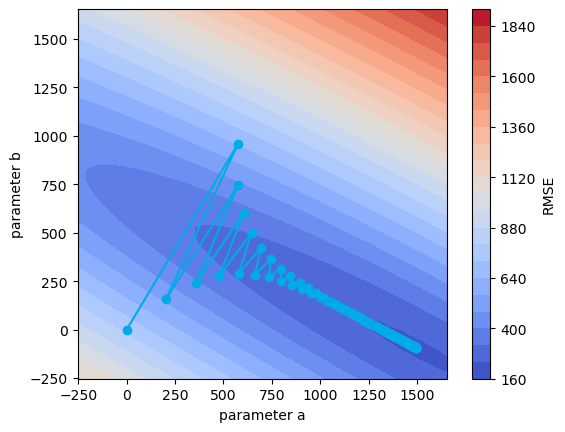

In [25]:
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x, y)

As you can see, gradient descent is jumping from one side of the “cost function valley” to the other and converges slowly to the optimal solution in dark blue. Also, it seems that the algorithm is taking unnecessarily large steps in the direction of the b parameter.

We know from the last units that gradient descent is following the opposite direction of the gradient. In our example, the algorithm is taking this **suboptimal path** because this direction is far from being the direction of the optimal value. In other words, there seems to be a problem with the **gradient**.

### Issue with the gradient

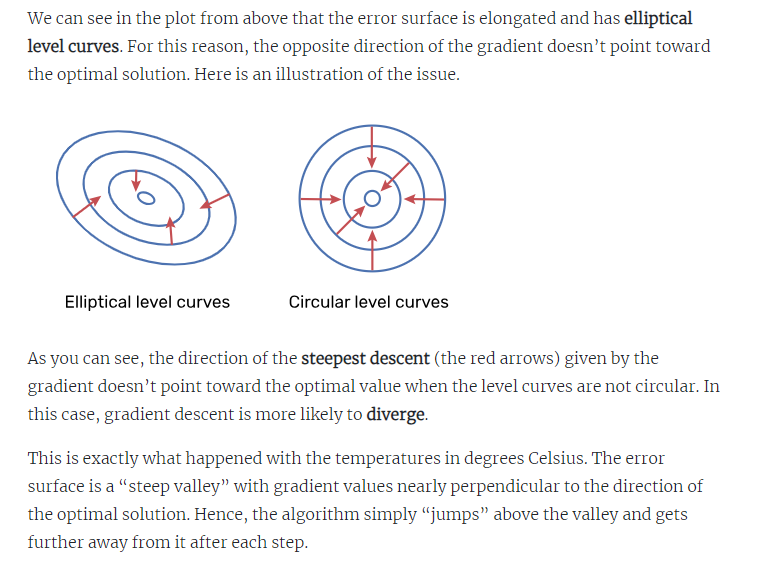

### Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways.

- The direction of the **steepest descent** isn’t necessarily the direction of the **optimal solution**.
- For this reason, gradient descent is sensitive to the **scale of the features**.

In the next unit, we will see how to solve the issue with standardization.

## 06. Standardization

In the last unit, we saw that gradient descent is sensitive to the scale of the features. We will now learn how to solve this issue with **standardization**. We will continue to work with the code from the previous unit.

### Standardization

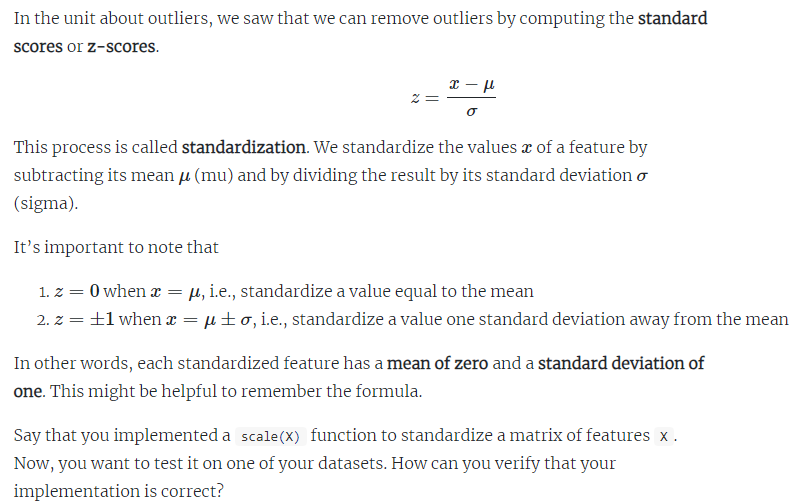

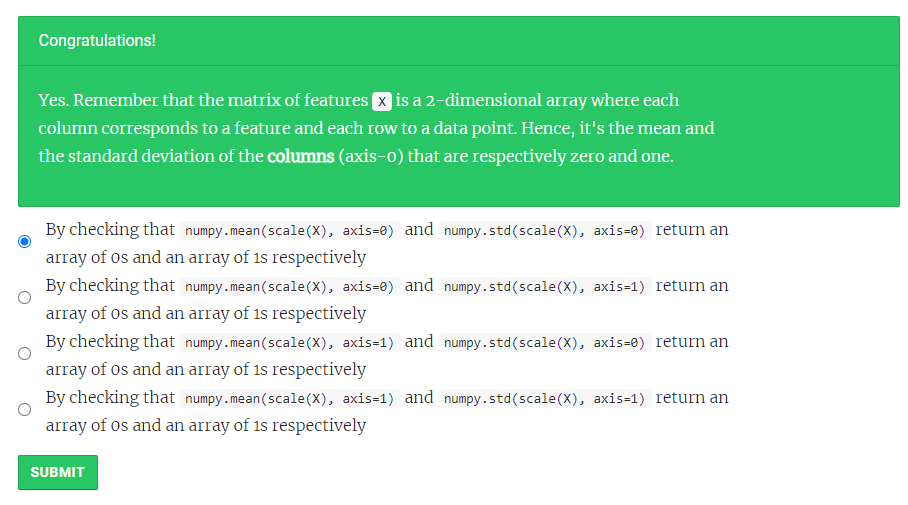

### Standardize temperatures

Scikit-learn implements a scale() function in its preprocessing module to apply standardization. Let’s try it with the temperature variable x from the previous unit.




In [26]:
from sklearn.preprocessing import scale

# Standardize x
x_standardized = scale(x)

print("Mean:", x_standardized.mean())
print("Standard deviation:", x_standardized.std())

Mean: -7.058371547285764e-17
Standard deviation: 1.0


We can see that the mean is very close to zero, i.e., it’s a seven preceded by 16 zeros. It’s not exactly zero because computers store **floating point numbers** using a limited amount of memory. For this reason, small **rounding errors** can occur. You can take a look at this website which explains the problem in more details.

Let’s rerun the gradient descent algorithm with this x_standardized variable. Here is the code from the previous unit.

In [27]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x_standardized + b
    error = y - y_pred
    a_grad = -2 * np.mean(x_standardized * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)

We can now plot the error surface with the visualize_steps() function from the previous unit.

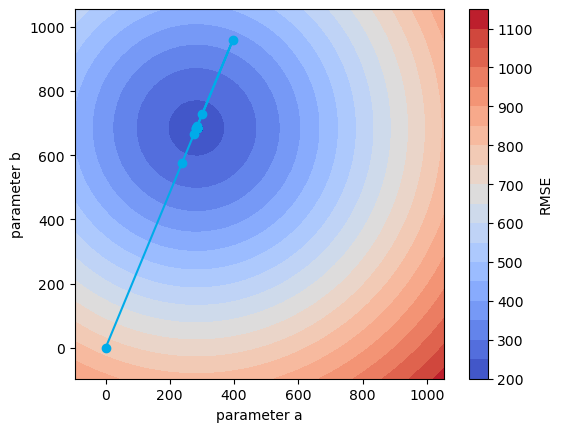

In [28]:
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x_standardized, y)

As we can see, the level curves are now perfectly circular and that the algorithm goes in the **direction of the optimal solution**. However, it seems that the algorithm overshoots the optimal solution. We can counteract this behavior by decreasing the learning rate.

In [54]:
# Initialization
lr = 0.1
a, b = 0, 0
n_steps = 400

If you rerun the algorithm and plot the error surface, you should get the following result.

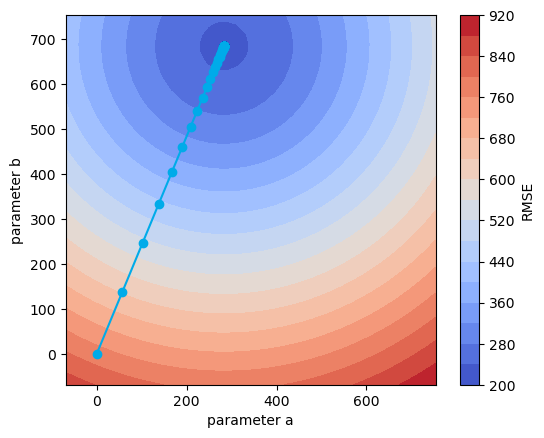

In [55]:
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x_standardized + b
    error = y - y_pred
    a_grad = -2 * np.mean(x_standardized * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)
    
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x_standardized, y)

###### Summary
In this unit, we learned about standardization. Here are a few takeaways.

- We should always apply **standardization** before running gradient descent.
- Standardized features have a **mean of zero** and a **standard deviation of one**.
- Gradient descent is **faster to converge** when features are standardized.

In the next exercise, you will implement gradient descent to fit a multiple linear regression model. Hence, you will need to standardize each feature in the dataset before applying the algorithm.

